# 作業:
    請修改 Name 中, 自定義的 Layer 名稱
    增加一層全連接層
    宣告 MODEL API, 分別採用自行定義的 Input/Output Layer
    model.summary 查看 Layers stack

In [1]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

#主要輸入接收新聞標題本身，即一個整數序列（每個整數編碼一個詞）。
#這些整數在1 到10,000 之間（10,000 個詞的詞彙表），且序列長度為100 個詞
#宣告一個 NAME 去定義Input
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# Embedding 層將輸入序列編碼為一個稠密向量的序列，
# 每個向量維度為 512。
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# LSTM 層把向量序列轉換成單個向量，
# 它包含整個序列的上下文信息
lstm_out = LSTM(32)(x)

Using TensorFlow backend.


In [2]:
#插入輔助損失，使得即使在模型主損失很高的情況下，LSTM 層和Embedding 層都能被平穩地訓練
#news_output = Dense(1, activation='sigmoid', name='news_out')(lstm_out)
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

In [3]:
#輔助輸入數據與LSTM 層的輸出連接起來，輸入到模型
import keras
#news_input = Input(shape=(5,), name='news_in')
auxiliary_input = Input(shape=(5,), name='aux_input')

#x = keras.layers.concatenate([lstm_out, news_input])
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# 堆疊多個全連接網路層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

#增加一層全連階層
x = Dense(64, activation='relu')(x)

# 最後添加主要的邏輯回歸層
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [4]:
# 宣告 MODEL API, 分別採用自行定義的 Input/Output Layer
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

In [5]:
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           69760       embedding_1[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

ref:  
[Guide to the Functional API](https://keras.io/getting-started/functional-api-guide/)

<!-- 
[开始使用 Keras 函数式 API](https://keras.io/zh/getting-started/functional-api-guide/)
-->

In [8]:
import pydot

# ref: https://keras.io/utils/#print_summary
keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')

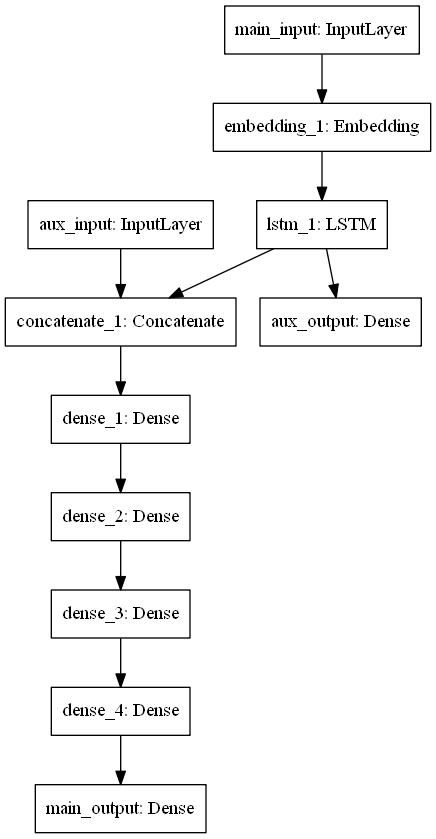

In [9]:
from IPython.display import Image  

Image('model.png')

ref:  
[keras.utils.plot_model](https://keras.io/utils/#plot_model)